# DiploDatos Kaggle Competition
###PREPARACION DE DATOS A VALIDAR (SIN VARIABLE TRANSPORTED

#### Librerias externas

In [206]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

#### Información de nuestra base de datos

* PassengerId: Identificación única para cada pasajero. 

* HomePlanet: El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.

* CryoSleep: Indica si el pasajero eligió ponerse en modo suspendido durante la duración del viaje.Los pasajeros en criosueño están confinados en sus cabinas.

* Cabina : El número de cabina donde se hospeda el pasajero. Toma la forma cubierta/número/lado, donde lado puede ser P para babor o S para estribor.

* Destino: El planeta al que desembarcará el pasajero.

* Edad - La edad del pasajero.

* VIP: si el pasajero ha pagado por un servicio VIP especial durante el viaje.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.

* Nombre - El nombre y apellido del pasajero.

* Transportado: Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que está tratando de predecir.

In [207]:
####Pablo
#train_data = pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\AprendizajeSupervisado-master\Práctico\train.csv',index_col=0)
#test_data = pd.read_csv(r'C:\Users\Pablo Madriaga\OneDrive - Helacor S.A\ArchivosPersonal\Diplomatura Ciencia De Datos\4. Aprendizaje Supervisado\AprendizajeSupervisado-master\Práctico\test.csv',index_col=0)

In [208]:
####MELANI
#train_data = pd.read_csv(r'C:\Users\Usuario\Desktop\Roco\Aprendizaje supervisado Diplo\Práctico\train.csv',index_col=0)
#test_data = pd.read_csv(r'C:\Users\Usuario\Desktop\Roco\Aprendizaje supervisado Diplo\Práctico\test.csv',index_col=0)

In [209]:
test_data = pd.read_csv('test.csv')
test_data = test_data.set_index('PassengerId',drop=True)
len(test_data)
#test_data_id=test_data['PassengerId']
#test_data_id
#test_data=test_data.drop(axis=1, columns='PassengerId')

870

In [210]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 415 to 5171
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    848 non-null    object 
 1   CryoSleep     849 non-null    object 
 2   Cabin         855 non-null    object 
 3   Destination   848 non-null    object 
 4   Age           853 non-null    float64
 5   VIP           851 non-null    object 
 6   RoomService   843 non-null    float64
 7   FoodCourt     842 non-null    float64
 8   ShoppingMall  850 non-null    float64
 9   Spa           845 non-null    float64
 10  VRDeck        851 non-null    float64
 11  Name          854 non-null    object 
dtypes: float64(6), object(6)
memory usage: 88.4+ KB


In [211]:
test_data['VIP'].value_counts()

False    835
True      16
Name: VIP, dtype: int64

In [212]:
print(test_data)

            HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
PassengerId                                                              
415             Europa      True       NaN    55 Cancri e  34.0  False   
8663             Earth      True  G/1489/S  PSO J318.5-22  13.0  False   
4524             Earth     False   G/776/P    TRAPPIST-1e  44.0  False   
8246             Earth     False   E/577/S  PSO J318.5-22  63.0  False   
2935            Europa     False   B/117/S    55 Cancri e  10.0  False   
...                ...       ...       ...            ...   ...    ...   
5996              Mars     False  F/1212/S    TRAPPIST-1e  54.0  False   
5478             Earth      True   G/947/S    TRAPPIST-1e  58.0  False   
6760             Earth      True  G/1148/P  PSO J318.5-22  18.0  False   
1437             Earth     False   F/293/S    TRAPPIST-1e  18.0  False   
5171             Earth     False  F/1059/S    TRAPPIST-1e  20.0  False   

             RoomService  FoodCourt  

Resumen:

* Cómo podemos observar nuestros datos train , poseen 7823 filas y 14 columnas
* Posee valores nulos 

In [213]:
test_data.isna().sum()

HomePlanet      22
CryoSleep       21
Cabin           15
Destination     22
Age             17
VIP             19
RoomService     27
FoodCourt       28
ShoppingMall    20
Spa             25
VRDeck          19
Name            16
dtype: int64

In [214]:
test_data.HomePlanet.value_counts()

Earth     488
Europa    196
Mars      164
Name: HomePlanet, dtype: int64

In [215]:
test_data.Destination.value_counts()

TRAPPIST-1e      599
55 Cancri e      175
PSO J318.5-22     74
Name: Destination, dtype: int64

<AxesSubplot:>

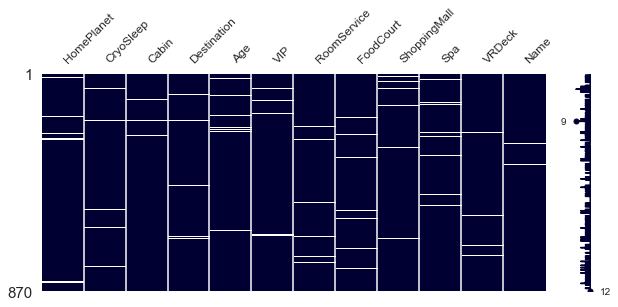

In [216]:
msno.matrix(test_data,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

In [217]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,853.000000,843.000000,842.000000,850.000000,845.000000,851.000000
mean,28.365768,212.036773,480.244656,183.868235,366.613018,389.202115
std,14.734022,540.472541,1520.062833,662.730668,1165.274281,1536.008227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,74.500000,160.500000,22.750000,89.000000,45.500000
max,74.000000,5888.000000,17394.000000,9058.000000,14970.000000,17306.000000


In [218]:
categorical_columns=[]
numerical_columns=[]
for i in test_data.columns:
    if test_data[i].dtype=='object':
        categorical_columns.append(i)
    elif test_data[i].dtype in ['int64','float64']:
        numerical_columns.append(i)

print(categorical_columns)
print(numerical_columns)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


<AxesSubplot:>

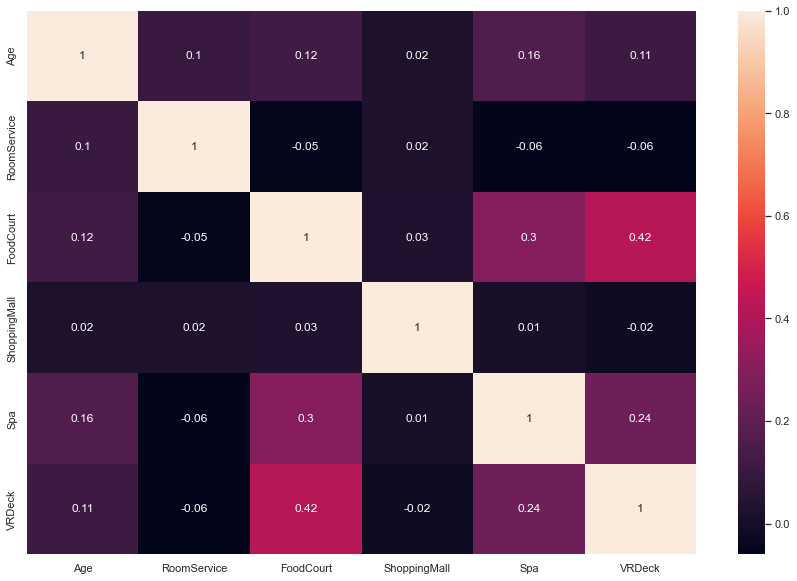

In [219]:
sns.set(rc = {'figure.figsize':(15,10)})
correlation_matrix=test_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

(array([727.,  45.,  22.,  17.,   6.,   5.,   0.,   4.,   2.,   1.,   1.,
          3.,   2.,   1.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,
          0.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    0.  ,   432.65,   865.3 ,  1297.95,  1730.6 ,  2163.25,
         2595.9 ,  3028.55,  3461.2 ,  3893.85,  4326.5 ,  4759.15,
         5191.8 ,  5624.45,  6057.1 ,  6489.75,  6922.4 ,  7355.05,
         7787.7 ,  8220.35,  8653.  ,  9085.65,  9518.3 ,  9950.95,
        10383.6 , 10816.25, 11248.9 , 11681.55, 12114.2 , 12546.85,
        12979.5 , 13412.15, 13844.8 , 14277.45, 14710.1 , 15142.75,
        15575.4 , 16008.05, 16440.7 , 16873.35, 17306.  ]),
 <BarContainer object of 40 artists>)

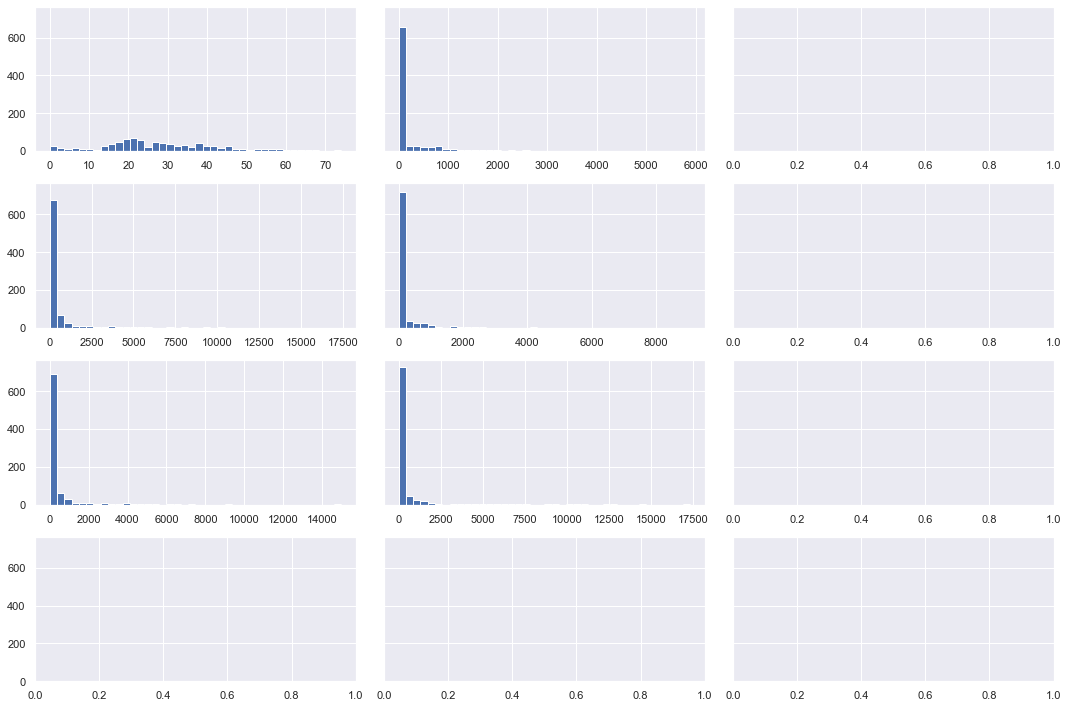

In [220]:
fig, axs = plt.subplots(4, 3, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0,0].hist(test_data['Age'], bins=40)
axs[0,1].hist(test_data['RoomService'], bins=40)
axs[1,0].hist(test_data['FoodCourt'], bins=40)
axs[1,1].hist(test_data['ShoppingMall'], bins=40)
axs[2,0].hist(test_data['Spa'], bins=40)
axs[2,1].hist(test_data['VRDeck'], bins=40)


In [221]:
#No hay un desbalanceo desmedido en los datos train de la variable objetivo

#### DATOS TRAIN

<AxesSubplot:>

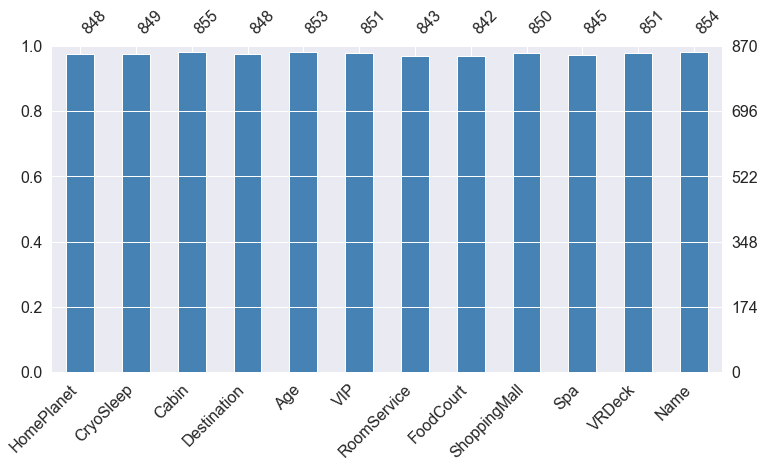

In [222]:
msno.bar(test_data,figsize=(12,6),color='steelblue')

In [223]:
categorical_columns=[]
numerical_columns=[]
for i in test_data.columns:
    if test_data[i].dtype=='object':
        categorical_columns.append(i)
    elif test_data[i].dtype in ['int64','float64']:
        numerical_columns.append(i)

print(categorical_columns)
print(numerical_columns)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [224]:
#numerical_columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for columna in categorical_columns[:(len(categorical_columns))]:
  fig, ax1 = plt.subplots()
  chart=sns.countplot(y = columna,
                data = train_data,
                palette = 'Set3')
  fig.set_size_inches(10, 5)
  fig.tight_layout()

            HomePlanet CryoSleep     Cabin    Destination       Age    VIP  \
PassengerId                                                                  
415             Europa      True       NaN    55 Cancri e  0.459459  False   
8663             Earth      True  G/1489/S  PSO J318.5-22  0.175676  False   
4524             Earth     False   G/776/P    TRAPPIST-1e  0.594595  False   
8246             Earth     False   E/577/S  PSO J318.5-22  0.851351  False   
2935            Europa     False   B/117/S    55 Cancri e  0.135135  False   
...                ...       ...       ...            ...       ...    ...   
5996              Mars     False  F/1212/S    TRAPPIST-1e  0.729730  False   
5478             Earth      True   G/947/S    TRAPPIST-1e  0.783784  False   
6760             Earth      True  G/1148/P  PSO J318.5-22  0.243243  False   
1437             Earth     False   F/293/S    TRAPPIST-1e  0.243243  False   
5171             Earth     False  F/1059/S    TRAPPIST-1e  0.270

C:\Users\Varios\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


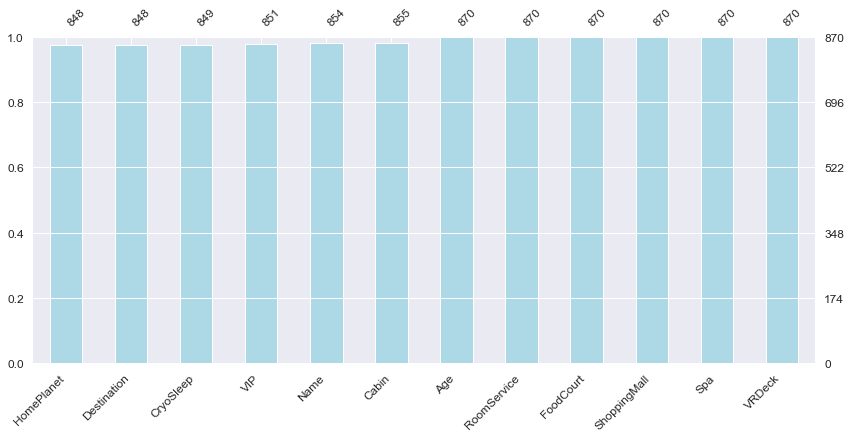

In [225]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

##Normalizamos numéricas
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])
#################################

####imputamos Nans de numéricas
test_2 = test_data.copy()
print(test_2)
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
test_2[numerical_columns] = kn_imputer.fit_transform(test_2[numerical_columns])
print(len(test_2))
###########################
msno.bar(test_2,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')
########################
test_2.info()

In [226]:
test_2.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,0.382833,0.035941,0.027157,0.020204,0.024123,0.022352
std,0.197872,0.090805,0.086059,0.072473,0.076863,0.087893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256757,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351351,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.014521,0.009845,0.002870,0.006333,0.002817
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
###Se imputan las variables categoricas para VIP y CryoSleep
# import modules
from numpy import isnan
from sklearn.impute import SimpleImputer
 
# defining the imputer
imputer = SimpleImputer(strategy='most_frequent')

label_columns=['VIP','CryoSleep','HomePlanet','Destination']
 
# transform the dataset
test_2[label_columns] = imputer.fit_transform(test_2[label_columns])
   
# count the number of NaN values in each column
test_2.info()
test_2['HomePlanet'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 415 to 5171
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    870 non-null    object 
 1   CryoSleep     870 non-null    bool   
 2   Cabin         855 non-null    object 
 3   Destination   870 non-null    object 
 4   Age           870 non-null    float64
 5   VIP           870 non-null    bool   
 6   RoomService   870 non-null    float64
 7   FoodCourt     870 non-null    float64
 8   ShoppingMall  870 non-null    float64
 9   Spa           870 non-null    float64
 10  VRDeck        870 non-null    float64
 11  Name          854 non-null    object 
dtypes: bool(2), float64(6), object(4)
memory usage: 76.5+ KB


Earth     510
Europa    196
Mars      164
Name: HomePlanet, dtype: int64

<AxesSubplot:>

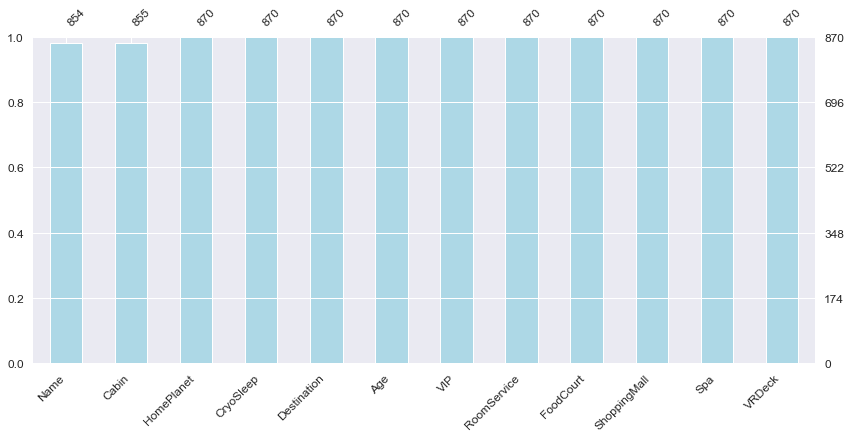

In [228]:
msno.bar(test_2,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

In [229]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in test_2:
    if test_2[var].dtype == 'object':
        unique_cases = test_2[var].unique()
        if len(unique_cases) > 5:
            print(var)
            test_2.drop(var, inplace=True, axis=1)

print(test_2.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    test_2[col] = test_2[col].astype(str)
    test_2[col] = LabelEncoder().fit_transform(test_2[col])

test_2_names = test_2.columns
test_2
#X = StandardScaler().fit_transform(X)
#X = pd.DataFrame(X, columns=x_names)
#X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,
415,1,1,0,0.459459,0,0.000000,0.000000,0.000000,0.000000,0.000000
8663,0,1,1,0.175676,0,0.000000,0.000000,0.000000,0.000000,0.000000
4524,0,0,2,0.594595,0,0.003736,0.000057,0.000000,0.057715,0.000000
8246,0,0,1,0.851351,0,0.000000,0.000000,0.008832,0.000000,0.134173
2935,1,0,0,0.135135,0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5996,2,0,2,0.729730,0,0.114810,0.000000,0.025502,0.025317,0.000000
5478,0,1,2,0.783784,0,0.000000,0.000000,0.000000,0.000000,0.000000
6760,0,1,1,0.243243,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [230]:
# one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehotencoder= encoder.fit_transform(test_2[label_cols])

In [231]:
# create object for the feature names using the categorical variables
encoder_feature_names = encoder.get_feature_names(label_cols)
###
# create a dataframe to hold the one hot encoded variables
onehot_dataframe = pd.DataFrame(onehotencoder, columns = encoder_feature_names)
onehot_dataframe

test_2 = pd.concat([test_2[numerical_columns].reset_index(drop=True), onehot_dataframe.reset_index(drop=True)], axis = 1)
test_ids=pd.DataFrame(test_data.index)
test_ids
test_2 = pd.concat([test_2, test_ids],axis=1)
test_2
#test_2

C:\Users\Varios\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,Destination_0,Destination_1,Destination_2,VIP_0,VIP_1,PassengerId
0,0.459459,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,415
1,0.175676,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8663
2,0.594595,0.003736,0.000057,0.000000,0.057715,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4524
3,0.851351,0.000000,0.000000,0.008832,0.000000,0.134173,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,8246
4,0.135135,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.729730,0.114810,0.000000,0.025502,0.025317,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5996
866,0.783784,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5478
867,0.243243,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6760
868,0.243243,0.129925,0.000000,0.001435,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1437


In [232]:
test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            870 non-null    float64
 1   RoomService    870 non-null    float64
 2   FoodCourt      870 non-null    float64
 3   ShoppingMall   870 non-null    float64
 4   Spa            870 non-null    float64
 5   VRDeck         870 non-null    float64
 6   HomePlanet_0   870 non-null    float64
 7   HomePlanet_1   870 non-null    float64
 8   HomePlanet_2   870 non-null    float64
 9   CryoSleep_0    870 non-null    float64
 10  CryoSleep_1    870 non-null    float64
 11  Destination_0  870 non-null    float64
 12  Destination_1  870 non-null    float64
 13  Destination_2  870 non-null    float64
 14  VIP_0          870 non-null    float64
 15  VIP_1          870 non-null    float64
 16  PassengerId    870 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 115.7 KB


In [233]:
test_2.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep_0',
       'CryoSleep_1', 'Destination_0', 'Destination_1', 'Destination_2',
       'VIP_0', 'VIP_1', 'PassengerId'],
      dtype='object')

In [234]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,853.000000,843.000000,842.000000,850.000000,845.000000,851.000000
mean,0.383321,0.036012,0.027610,0.020299,0.024490,0.022489
std,0.199108,0.091792,0.087390,0.073165,0.077841,0.088756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256757,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351351,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.513514,0.012653,0.009227,0.002512,0.005945,0.002629
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0    393
1    261
2    186
3     29
4      1
Name: cant_var_outl, dtype: int64

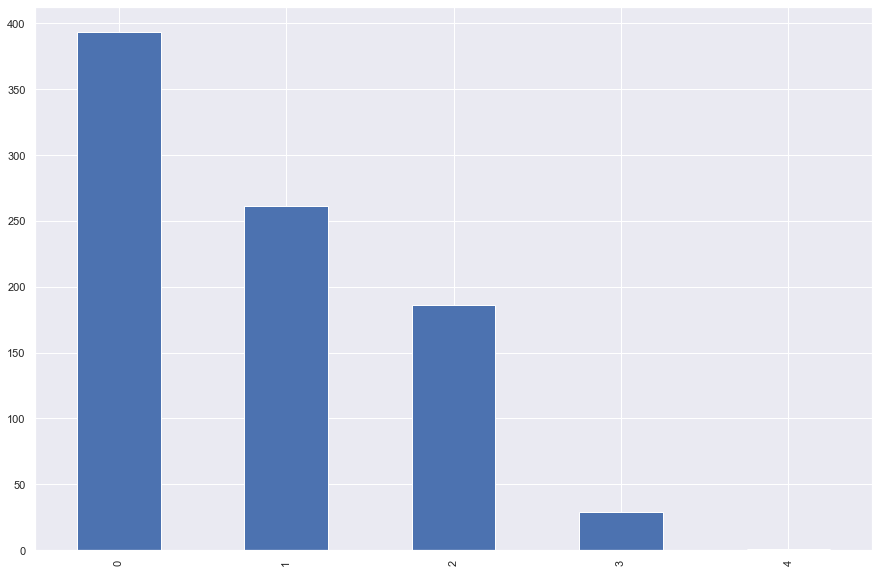

In [235]:
##outliers--Tratamiento
q1 = test_2['Age'].quantile(0.25)
q3 = test_2['Age'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
test_2['out_age']=np.where((test_2['Age'] >ls)|(test_2['Age'] < li),1,0)
  
#outliers
q1 = test_2['RoomService'].quantile(0.25)
q3 = test_2['RoomService'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
test_2['out_RoomService']=np.where((test_2['RoomService'] >ls)|(test_2['RoomService'] < li),1,0)
test_2  

q1 = test_2['FoodCourt'].quantile(0.25)
q3 = test_2['FoodCourt'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
test_2['out_FoodCourt']=np.where((test_2['FoodCourt'] >ls)|(test_2['FoodCourt'] < li),1,0)
test_2  

q1 = test_2['ShoppingMall'].quantile(0.25)
q3 = test_2['ShoppingMall'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
test_2['out_ShoppingMall']=np.where((test_2['ShoppingMall'] >ls)|(test_2['ShoppingMall'] < li),1,0)
test_2 

q1 = test_2['Spa'].quantile(0.25)
q3 = test_2['Spa'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
test_2['out_Spa']=np.where((test_2['Spa'] >ls)|(test_2['Spa'] < li),1,0)


q1 = test_2['VRDeck'].quantile(0.25)
q3 = test_2['VRDeck'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
test_2['out_VRDeck']=np.where((test_2['VRDeck'] >ls)|(test_2['VRDeck'] < li),1,0)
test_2 

####
test_2['cant_var_outl']= test_2['out_age']+test_2['out_RoomService']+test_2['out_FoodCourt']+test_2['out_ShoppingMall']+test_2['out_VRDeck']
##Cantidad de outliers por observación
test_2['cant_var_outl'].value_counts()[:10].plot(kind='bar')
test_2['cant_var_outl'].value_counts()
###

In [236]:
# Se quitan aquellos registros donde se observa que para 4 variables bajo análisis tienen outliers
test_2_ =test_2[test_2['cant_var_outl']<4]
                                  
len(test_2_)

869

In [237]:
test_2.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep_0',
       'CryoSleep_1', 'Destination_0', 'Destination_1', 'Destination_2',
       'VIP_0', 'VIP_1', 'PassengerId', 'out_age', 'out_RoomService',
       'out_FoodCourt', 'out_ShoppingMall', 'out_Spa', 'out_VRDeck',
       'cant_var_outl'],
      dtype='object')

In [238]:
test_2_=test_2_.drop(['out_age', 'out_RoomService', 'out_FoodCourt',
       'out_ShoppingMall', 'out_Spa', 'out_VRDeck', 'cant_var_outl'],axis=1)
test_2_.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep_0',
       'CryoSleep_1', 'Destination_0', 'Destination_1', 'Destination_2',
       'VIP_0', 'VIP_1', 'PassengerId'],
      dtype='object')

In [239]:
#test_data_id=pd.DataFrame(test_data_id)
#test_data_id

In [240]:
#test_2_=pd.concat([test_data_id,test_2_],axis=1)
test_2_

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep_0,CryoSleep_1,Destination_0,Destination_1,Destination_2,VIP_0,VIP_1,PassengerId
0,0.459459,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,415
1,0.175676,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8663
2,0.594595,0.003736,0.000057,0.000000,0.057715,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4524
3,0.851351,0.000000,0.000000,0.008832,0.000000,0.134173,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,8246
4,0.135135,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.729730,0.114810,0.000000,0.025502,0.025317,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5996
866,0.783784,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5478
867,0.243243,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6760
868,0.243243,0.129925,0.000000,0.001435,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1437


<AxesSubplot:>

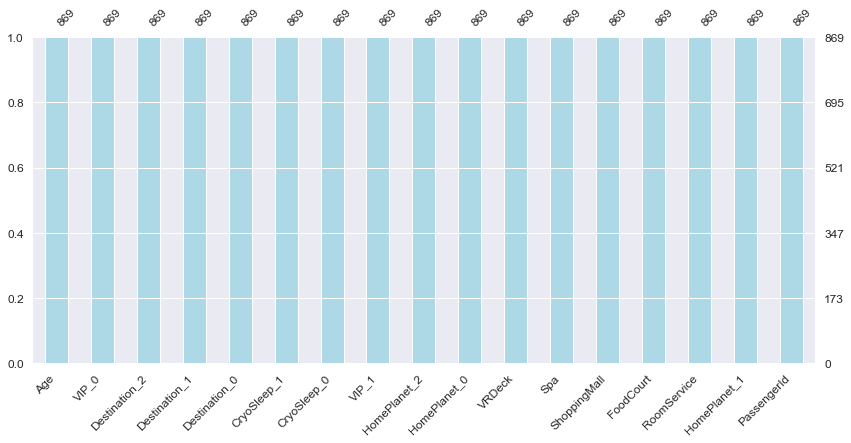

In [241]:
msno.bar(test_2_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

In [243]:
##se guarda el archivo test curado
from pathlib import Path  
filepath = Path(r'C:\Users\Varios\Desktop\Diplodatos\AprendizajeSupervisado-master\AprendizajeSupervisado-master\test_curado.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
test_2_.to_csv(filepath)